In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

In [2]:
from lifelines.fitters import ParametricRegressionFitter
from autograd import numpy as np
from lifelines.datasets import load_rossi


In [3]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)
data_GAN = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival_2.csv'),
                  index_col=None)

data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

data_GAN_x = data_GAN.iloc[:, 2:]
data_GAN_y = data_GAN.iloc[:, 0:2]

# Lifetime

Text(0.5, 1.0, 'Failure at $cycle=1e6$')

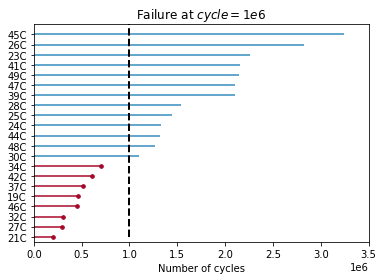

In [6]:
from lifelines.plotting import plot_lifetimes

current_time = 1000000

observed_lifetimes = np.minimum(data['F_Time'], current_time)
death_observed = data['F_Time'] < current_time

ax = plot_lifetimes(data['F_Time'], event_observed=death_observed)

ax.set_xlim(0, 3500000)
ax.vlines(1000000, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("Number of cycles")
ax.set_title("Failure at $cycle=1e6$")

# Kaplan Meier

## with original data

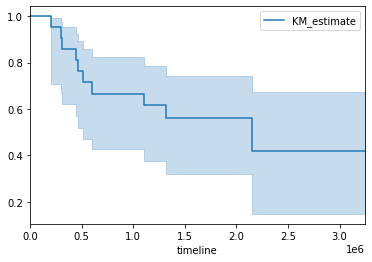

In [7]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(data_y["F_Time"], event_observed = data_y["Observed"])
kmf.plot()

## with GAN data

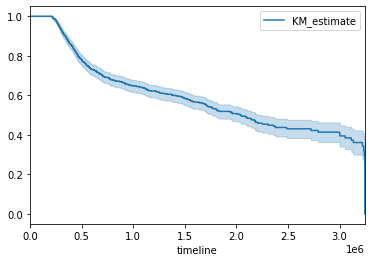

In [8]:
kmf = KaplanMeierFitter()
kmf.fit(data_GAN_y["F_Time"], event_observed = data_GAN_y["Observed"])
kmf.plot()

# Kaplan Meier by cycle at NDE

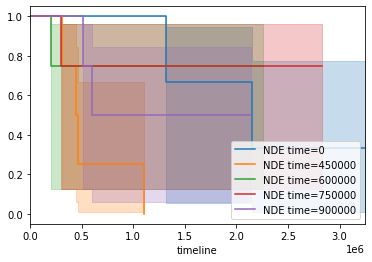

In [9]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_x['NDE_cycle'] == age
    kmf.fit(data_y["F_Time"][mask_treat], event_observed = data_y["Observed"][mask_treat], label=f'NDE time={age}')
    ax = kmf.plot()

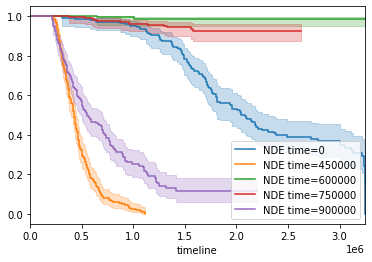

In [10]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_GAN_x['NDE_cycle'] == age
    kmf.fit(data_GAN_y["F_Time"][mask_treat], event_observed = data_GAN_y["Observed"][mask_treat], label=f'NDE time={age}')
    ax = kmf.plot()

# CoxPH regression

## with real data

/Users/peerapon/opt/anaconda3/envs/epri_mc/lib/python3.8/site-packages/lifelines/utils/__init__.py:1094: ConvergenceWarning: Column(s) ['pos_ratio'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/Users/peerapon/opt/anaconda3/envs/epri_mc/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1579: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


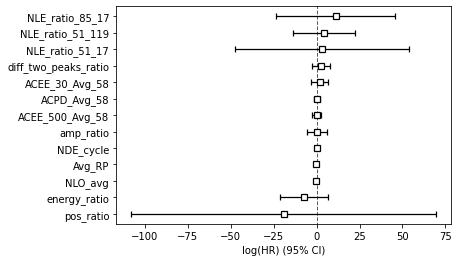

In [11]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data, duration_col='F_Time', event_col='Observed')
cph.plot()

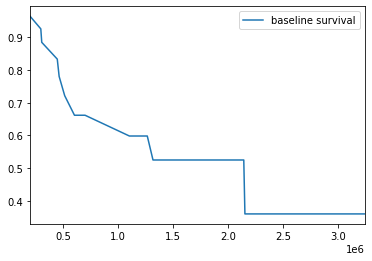

In [12]:
cph.baseline_survival_.plot()

## with GAN data

/Users/peerapon/opt/anaconda3/envs/epri_mc/lib/python3.8/site-packages/lifelines/utils/__init__.py:1094: ConvergenceWarning: Column(s) ['pos_ratio'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


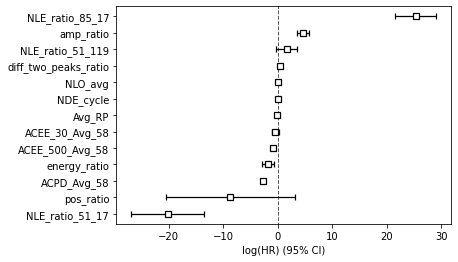

In [13]:
cph.fit(data_GAN, duration_col='F_Time', event_col='Observed')
cph.plot()

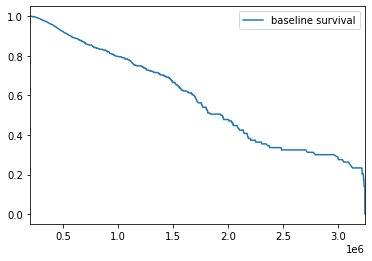

In [14]:
cph.baseline_survival_.plot()

# Weibull AFT

In [15]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    data_GAN, test_size=0.25)

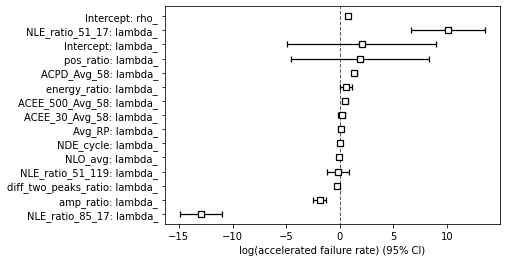

In [16]:
from lifelines import WeibullAFTFitter

weib = WeibullAFTFitter()
weib.fit(df_train, duration_col='F_Time', event_col='Observed')
weib.plot()

In [17]:
surv = weib.predict_survival_function(df_test)


In [56]:
df_test.columns

Index(['Observed', 'F_Time', 'NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio',
       'pos_ratio', 'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17',
       'NLE_ratio_119_17', 'NLO_avg', 'Avg_RP', 'ACEE_30_Avg_58',
       'ACEE_500_Avg_58', 'ACPD_Avg_58'],
      dtype='object')

In [18]:
df_test.shape

(250, 15)

In [19]:
surv.columns

Int64Index([328,  73, 362, 417, 815, 181, 481, 612, 161,   9,
            ...
            355, 739, 924, 505,  40, 321, 887, 269, 324, 203],
           dtype='int64', length=250)

In [49]:
surv

,574,69,876,221,582,17,432,940,371,785,...,787,987,722,194,964,985,834,80,698,929
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764


In [51]:
surv

,574,69,876,221,582,17,432,940,371,785,...,787,987,722,194,964,985,834,80,698,929
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
2.000070e+05,0.988133,0.993115,0.992599,0.902568,0.993522,0.986264,0.992473,0.987025,0.968181,0.997222,...,0.992424,0.986108,0.996081,0.996649,0.974045,8.563267e-01,0.998582,0.978374,0.998559,0.981876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764
3.245267e+06,0.303300,0.501356,0.475975,0.000036,0.522306,0.251033,0.469965,0.271138,0.039498,0.757329,...,0.467660,0.247074,0.675398,0.715011,0.072220,1.854923e-07,0.867754,0.112493,0.865825,0.160764


In [20]:
weib.score(df_test, scoring_method='concordance_index')

0.8675207309201053

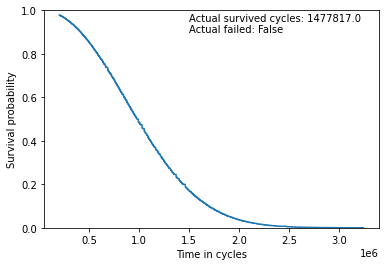

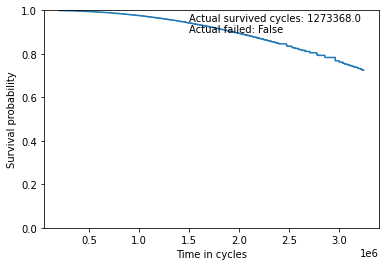

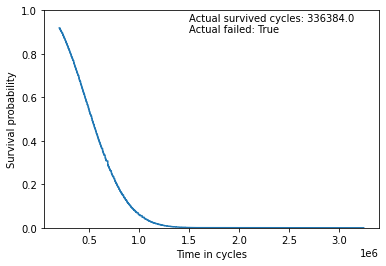

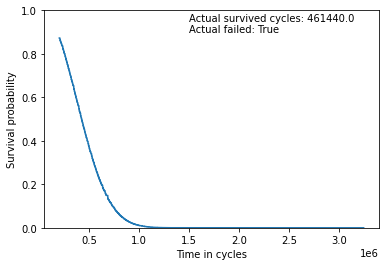

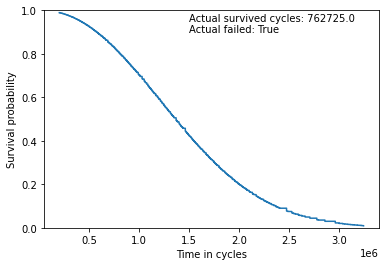

In [21]:
for i in range(0, 5):
    col = surv.columns[i]
    plt.step(surv.index, surv[col], where="post")
    plt.ylabel("Survival probability")
    plt.xlabel("Time in cycles")
    plt.ylim(0,1)
    plt.text(1500000, 0.95, 'Actual survived cycles: '+str(np.round(df_test['F_Time'].iloc[i],0)))
    plt.text(1500000, 0.90, 'Actual failed: '+str((df_test['Observed'].iloc[i])))
    plt.show()

## real data

In [22]:
data.shape

(21, 15)

In [25]:
weib.score(data, scoring_method='concordance_index')

0.8125

In [28]:
surv.head()

ID,41C,44C,45C,24C,34C,19C,30C,32C,46C,23C,...,21C,47C,27C,26C,28C,48C,37C,39C,42C,49C
200209.980829,0.999935,0.942777,0.999683,0.999769,0.995269,0.926766,0.977809,0.907901,0.969507,0.996210,...,0.970257,0.999408,0.990210,0.999326,0.993364,0.999884,0.901385,0.998514,0.996355,0.987755
200511.429876,0.999935,0.942594,0.999682,0.999769,0.995253,0.926534,0.977737,0.907613,0.969408,0.996198,...,0.970160,0.999406,0.990178,0.999324,0.993343,0.999884,0.901077,0.998509,0.996343,0.987715
206681.317961,0.999930,0.938788,0.999661,0.999753,0.994929,0.921709,0.976232,0.901612,0.967349,0.995938,...,0.968151,0.999365,0.989509,0.999278,0.992889,0.999876,0.894677,0.998407,0.996094,0.986880
209047.363175,0.999928,0.937297,0.999652,0.999747,0.994802,0.919820,0.975641,0.899265,0.966541,0.995836,...,0.967363,0.999350,0.989246,0.999260,0.992710,0.999873,0.892174,0.998367,0.995996,0.986552
211359.214092,0.999927,0.935823,0.999644,0.999740,0.994676,0.917953,0.975056,0.896946,0.965742,0.995735,...,0.966583,0.999334,0.988986,0.999242,0.992534,0.999870,0.889703,0.998327,0.995898,0.986227


0.8125


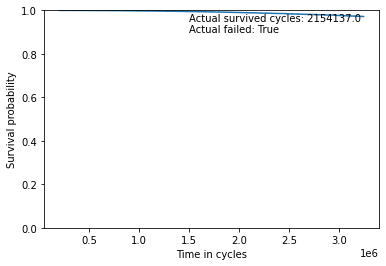

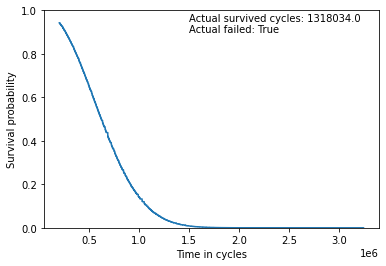

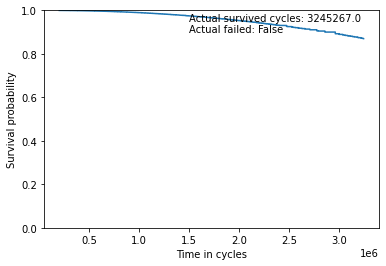

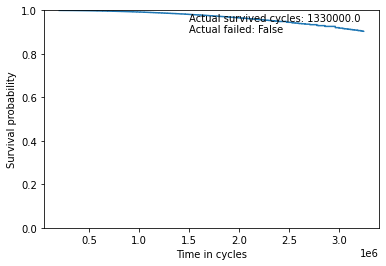

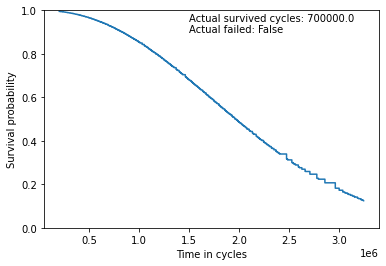

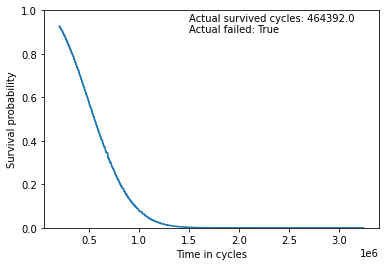

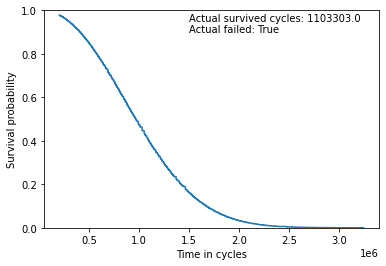

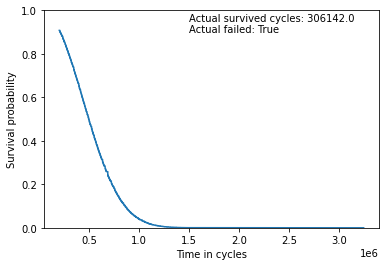

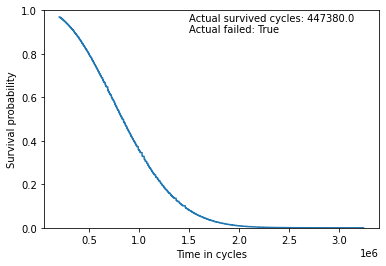

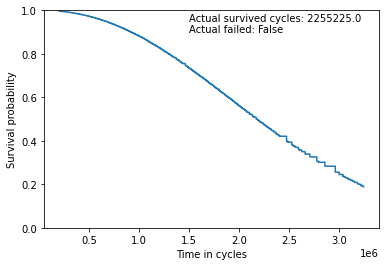

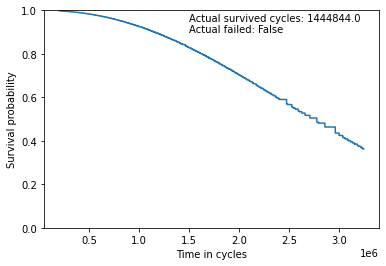

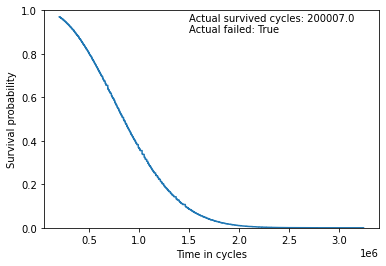

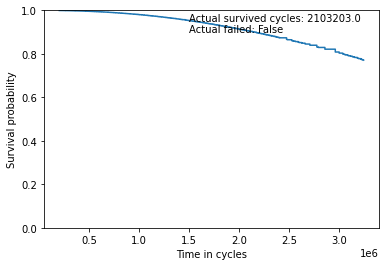

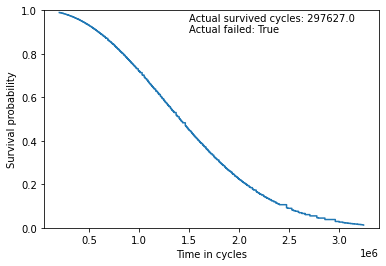

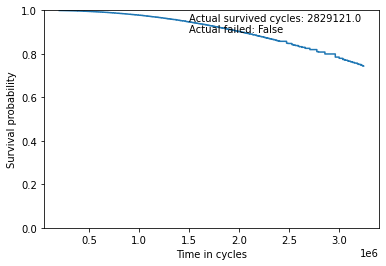

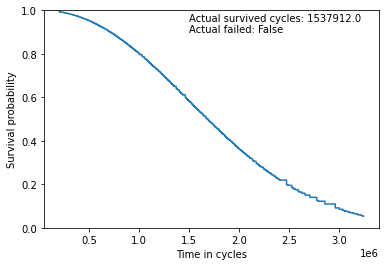

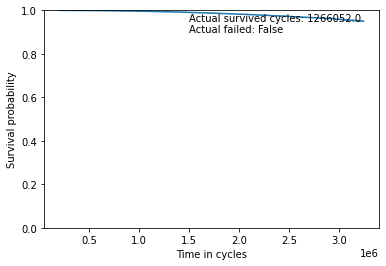

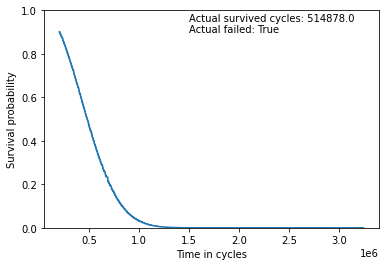

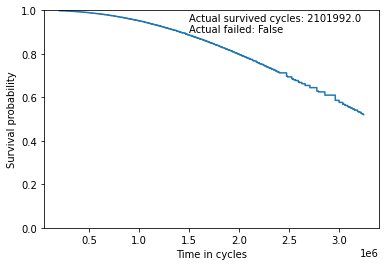

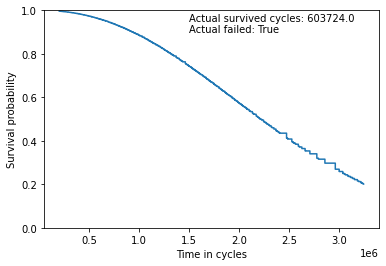

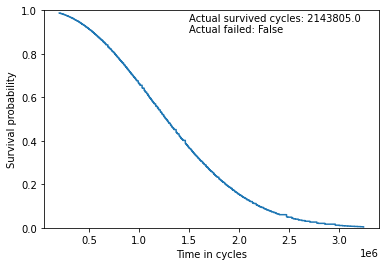

In [43]:
print(weib.score(data, scoring_method='concordance_index'))

surv = weib.predict_survival_function(data)

for i in data.index:
    col = i
    plt.step(surv.index, surv[col], where="post")
    plt.ylabel("Survival probability")
    plt.xlabel("Time in cycles")
    plt.ylim(0,1)
    plt.text(1500000, 0.95, 'Actual survived cycles: '+str(np.round(data['F_Time'].loc[i],0)))
    plt.text(1500000, 0.90, 'Actual failed: '+str((data['Observed'].loc[i])))
    plt.show()
    
    

In [79]:
weib.params_

param    covariate           
lambda_  ACEE_30_Avg_58           0.178713
         ACEE_500_Avg_58          0.478853
         ACPD_Avg_58              1.380967
         Avg_RP                   0.080124
         NDE_cycle                0.000001
         NLE_ratio_51_119        -0.179013
         NLE_ratio_51_17         10.104968
         NLE_ratio_85_17        -12.952656
         NLO_avg                 -0.088031
         amp_ratio               -1.870794
         diff_two_peaks_ratio    -0.203505
         energy_ratio             0.597398
         pos_ratio                1.894208
         Intercept                2.054302
rho_     Intercept                0.781139
dtype: float64

# Custom Regression

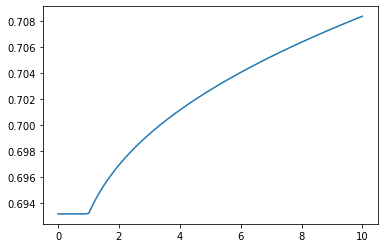

In [87]:
x_ = np.linspace(0, 10, 100)

c_= 150
z = np.clip((np.sqrt(x_/1) - np.sqrt(1/x_)) / (c_), 1e-100, np.inf)
H = -np.log(norm.cdf(-z))
plt.plot(x_, H)

In [88]:
z

array([1.00000000e-100, 1.00000000e-100, 1.00000000e-100, 1.00000000e-100,
       1.00000000e-100, 1.00000000e-100, 1.00000000e-100, 1.00000000e-100,
       1.00000000e-100, 1.00000000e-100, 6.70025210e-005, 7.02728369e-004,
       1.28445773e-003, 1.82171805e-003, 2.32172609e-003, 2.79007380e-003,
       3.23117877e-003, 3.64858973e-003, 4.04519917e-003, 4.42339513e-003,
       4.78517163e-003, 5.13221067e-003, 5.46594394e-003, 5.78760018e-003,
       6.09824173e-003, 6.39879338e-003, 6.69006513e-003, 6.97277051e-003,
       7.24754137e-003, 7.51493990e-003, 7.77546863e-003, 8.02957857e-003,
       8.27767609e-003, 8.52012867e-003, 8.75726975e-003, 8.98940284e-003,
       9.21680503e-003, 9.43973000e-003, 9.65841062e-003, 9.87306120e-003,
       1.00838794e-002, 1.02910480e-002, 1.04947363e-002, 1.06951015e-002,
       1.08922897e-002, 1.10864373e-002, 1.12776712e-002, 1.14661105e-002,
       1.16518665e-002, 1.18350436e-002, 1.20157398e-002, 1.21940474e-002,
       1.23700532e-002, 1

In [89]:
from lifelines.fitters import ParametricRegressionFitter
from autograd import numpy as np
from scipy.stats import norm

class BS_AFTFitter(ParametricRegressionFitter):

    # this class property is necessary, and should always be a non-empty list of strings.
    _fitted_parameter_names = ['lambda_']

    def _cumulative_hazard(self, params, t, Xs):
        # params is a dictionary that maps unknown parameters to a numpy vector.
        # Xs is a dictionary that maps unknown parameters to a numpy 2d array
        
#         beta = params['lambda_']
#         X = Xs['lambda_']
#         lambda_ = np.exp(np.dot(X, beta))

        c_ = params['lambda_']
        X = Xs['lambda_']
        z = np.clip((np.sqrt(X/1) - np.sqrt(1/X)) / (c_), 1e-16, np.inf)
        H = -np.log(norm.cdf(-z))
        return H


In [90]:
bs = BS_AFTFitter()
bs.fit(df_train, duration_col='F_Time', event_col='Observed')
bs.plot()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''